In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np

import scipy as scp
import sklearn
import sys, os, pickle

sys.path.append(os.path.join('..'))

from FACT.helper import *
from FACT.fairness import *
from FACT.data_util import *
from FACT.plot import *
from FACT.lin_opt import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
DATANAME='adult'
X_train, y_train, X_test, y_test, X_train_removed, X_test_removed, dtypes, dtypes_, sens_idc, race_idx, sex_idx = get_dataset(DATANAME)

In [5]:
try:
    #grid_base =  pickle.load(open('model_adult_base.pkl', 'rb'))[0]
    grid =  pickle.load(open('model_adult.pkl', 'rb'))[0]
    #model_base = grid_base.best_estimator_.named_steps['logisticregression']
    model = grid.best_estimator_.named_steps['logisticregression']
except:
    model_names = ['LogisticRegression']
    result = create_and_train_models(model_names, dtypes_, X_train_removed, y_train, X_test=X_test_removed, y_test=y_test, save=True, data_name=DATANAME)
    #result_base = create_and_train_models(model_names, dtypes, X_train, y_train, X_test=X_test, y_test=y_test, save=True, data_name=DATANAME + '_base')
    #model_base = result_base[0]['estimator']
    model = result[0]['estimator']

Training {'model_name': 'LogisticRegression', 'get_model': <function create_model.<locals>.get_model at 0x7fc264488840>, 'estimator': GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(categorical_features=array([False, False, False, False,  True,  True,  True,  True,  True,
        True]),
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=False)), ('standardscaler', StandardScaler(copy=True, with_me...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'logisticregression__C': array([0.0001, 0.1   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)}


In [7]:
# Get fairness matrix information
fm = FairnessMeasures(X_train, 
                      y_train, 
                      X_test, 
                      y_test, 
                      X_train_removed, 
                      X_test_removed, 
                      model, 
                      sex_idx, 
                      pos_label=1, 
                      neg_label=0)

mats, mats_dict, M_const, b_const = get_fairness_mats(fm)

In [8]:
result = test_all_enumerations(fm, mats)

['EqOdd', 'Calibration']	False	None
['EqOdd', 'PosClassBal']	True	0.23686779050537868
['EqOdd', 'NegClassBal']	True	0.23687069783024092
['EqOdd', 'ClassBal']	True	0.23686779050537812
['EqOdd', 'PredEqual']	True	0.23687069783024065
['EqOdd', 'EqOpp']	True	0.23687069783024517
['EqOdd', 'DemoParity']	True	0.23686670012609065
['Calibration', 'PosClassBal']	False	None
['Calibration', 'NegClassBal']	False	None
['Calibration', 'ClassBal']	False	None
['Calibration', 'PredEqual']	False	None
['Calibration', 'EqOpp']	False	None
['Calibration', 'DemoParity']	False	None
['PosClassBal', 'NegClassBal']	True	5.551115123125783e-16
['PosClassBal', 'ClassBal']	True	5.551115123125783e-16
['PosClassBal', 'PredEqual']	True	5.551115123125783e-16
['PosClassBal', 'EqOpp']	True	0.23686779050538145
['PosClassBal', 'DemoParity']	True	0.06537660169483518
['NegClassBal', 'ClassBal']	True	5.551115123125783e-16
['NegClassBal', 'PredEqual']	True	5.551115123125783e-16
['NegClassBal', 'EqOpp']	True	0.2368706978302413
['

['Calibration', 'ClassBal', 'EqOpp', 'DemoParity']	False	None
['Calibration', 'PredEqual', 'EqOpp', 'DemoParity']	False	None
['PosClassBal', 'NegClassBal', 'ClassBal', 'PredEqual']	True	5.551115123125783e-16
['PosClassBal', 'NegClassBal', 'ClassBal', 'EqOpp']	True	0.23686761483557744
['PosClassBal', 'NegClassBal', 'ClassBal', 'DemoParity']	True	0.23686850526483647
['PosClassBal', 'NegClassBal', 'PredEqual', 'EqOpp']	True	0.2368677905053817
['PosClassBal', 'NegClassBal', 'PredEqual', 'DemoParity']	True	0.23686786050122421
['PosClassBal', 'NegClassBal', 'EqOpp', 'DemoParity']	True	0.2368683724261097
['PosClassBal', 'ClassBal', 'PredEqual', 'EqOpp']	True	0.2368676148355797
['PosClassBal', 'ClassBal', 'PredEqual', 'DemoParity']	True	0.2368676111753222
['PosClassBal', 'ClassBal', 'EqOpp', 'DemoParity']	True	0.23686825100003317
['PosClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.23686826103477684
['NegClassBal', 'ClassBal', 'PredEqual', 'EqOpp']	True	0.23686779050538365
['NegClassBal'

['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'ClassBal', 'EqOpp', 'DemoParity']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	False	None
['EqOdd', 'Calibration', 'NegClassBal', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	False	None
['EqOdd', 'PosClassBal', 'NegClassBal', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.2368683167134493
['Calibration', 'PosClassBal', 'NegClassBal', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	False	None
['EqOdd', 'Calibration', 'PosClassBal', 'NegClassBal', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	False	None


In [9]:
some_names = [['PosClassBal', 'ClassBal'], 
              ['PredEqual', 'NegClassBal'],
              ['EqOdd', 'DemoParity'],
              ['EqOdd', 'PosClassBal', 'DemoParity'],
              ['EqOdd', 'ClassBal', 'PredEqual', 'DemoParity'],
              ['EqOdd', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity'],
              ['PosClassBal', 'DemoParity'], 
              ['Calibration', 'ClassBal', 'EqOpp', 'DemoParity'],
              ['PosClassBal', 'NegClassBal', 'Calibration'],
             ]
dd = test_some_names(fm, some_names)
res2text(dd)

['PosClassBal', 'ClassBal']	True	5.551115123125783e-16
['PredEqual', 'NegClassBal']	True	5.551115123125783e-16
['EqOdd', 'DemoParity']	True	0.23686670012609065
['EqOdd', 'PosClassBal', 'DemoParity']	True	0.23686826103483494
['EqOdd', 'ClassBal', 'PredEqual', 'DemoParity']	True	0.23686780488878947
['EqOdd', 'ClassBal', 'PredEqual', 'EqOpp', 'DemoParity']	True	0.2368662526605329
['PosClassBal', 'DemoParity']	True	0.06537660169483518
['Calibration', 'ClassBal', 'EqOpp', 'DemoParity']	False	None
['PosClassBal', 'NegClassBal', 'Calibration']	False	None


'PCB, CB &  o  & 1.0000\\ PE, NCB &  o  & 1.0000\\ EOd, DP &  o  & 0.7631\\ EOd, PCB, DP &  o  & 0.7631\\ EOd, CB, PE, DP &  o  & 0.7631\\ EOd, CB, PE, EOp, DP &  o  & 0.7631\\ PCB, DP &  o  & 0.9346\\ CG, CB, EOp, DP &  x  & -\\ PCB, NCB, CG &  x  & -\\ '

Calibration,ClassBal,EqOpp,DemoParity	0.0013749172258064205
PosClassBal,NegClassBal,Calibration	0.00036401748474461414


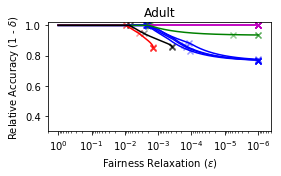

In [10]:
# First get (eps, delta) pairs for optimizing over different lambdas
lmbds_used = get_eps_delta_over_lambdas(mats_dict, M_const, b_const, some_names)

# NOTE manually set up the group for colors
groups = [0, 0, 1, 1, 1, 1, 2, 3, 4]
colors = ['m', 'b', 'g', 'r', 'k']
plot_eps_delta_curves(fm, 
                      some_names, 
                      lmbds_used, 
                      groups=groups, 
                      colors=colors, 
                      data_name='Adult',
                      save=True)

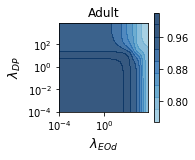

In [8]:
# Multi-dimensional regularization for fairness definitions:
name = ['EqOdd', 'DemoParity']
a, b = plot_accuracy_contours(mats_dict, 
                       name, 
                       M_const, 
                       b_const, 
                       bound=(4,4),
                       data_name='Adult',
                       save=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f19dc3323c8>,
      dtype=object)

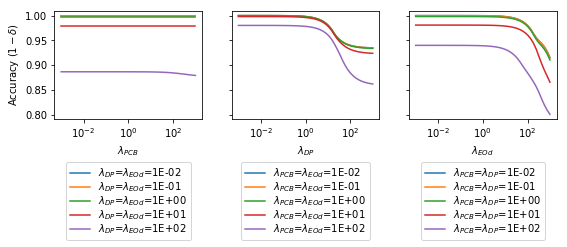

In [17]:
## Orderings
# NOTE place in the order of adding to the rest.
list_name = ['PosClassBal', 'DemoParity', 'EqOdd']
plot_slices(mats_dict, list_name, M_const, b_const, save=True, data_name='Adult')